In [1]:
import pandas as pd
import seaborn as sns

## RNN

### one x one

In [2]:
df_1x1 = pd.DataFrame({})
   
for vectorization in ['embedding_layer', 'bert_Embedding']:
     
    for rnn_layer in ['GRU','LSTM','BIGRU', 'BILSTM', 'Simple', 'BISimple', 'double-BILSTM', 'double-BIGRU']:
        
        if vectorization == 'embedding_layer' and rnn_layer in ['double-BILSTM', 'double-BIGRU']:
            continue
        
        for i in range(105):
        
            df = pd.read_csv(f'../models/intermediate_results/one-vs-one/simple_{rnn_layer}_{vectorization}_part{i}.csv')
            
            df_1x1 = pd.concat([df, df_1x1])

In [3]:
df_1x1.drop(['author1', 'author2'],axis = 1).groupby(['rnn_layer', 'vectorizer']).mean().sort_values('f1_macro')[['f1_macro', 'recall_macro', 'precision_macro', 'accuracy']].round(4) * 100

,,f1_macro,recall_macro,precision_macro,accuracy
rnn_layer,vectorizer,,,,
BISimple,embedding_layer,73.87,74.09,74.62,74.00
Simple,embedding_layer,74.55,74.77,75.30,74.68
LSTM,embedding_layer,77.07,77.35,78.12,77.25
BILSTM,embedding_layer,78.03,78.22,78.69,78.13
GRU,embedding_layer,78.17,78.30,78.63,78.24
BIGRU,embedding_layer,78.51,78.63,78.94,78.57
Simple,bert_Embedding,84.36,84.39,84.51,84.39
GRU,bert_Embedding,85.73,85.76,85.87,85.75
LSTM,bert_Embedding,85.88,85.91,86.05,85.91


Text(0.5, 1.0, 'Distribuição dos resultados de F1 macro para cada método de vetorização')

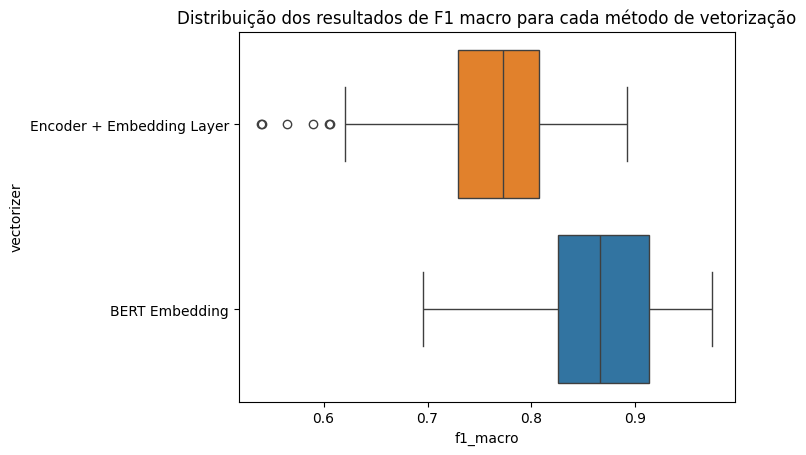

In [4]:
df_1x1_viz = df_1x1.copy()

df_1x1_viz.vectorizer = df_1x1_viz.vectorizer.map({
    'bert_Embedding': 'BERT Embedding',
    'embedding_layer': 'Encoder + Embedding Layer'
})

sns.boxplot(
    data = df_1x1_viz, 
    x="f1_macro", 
    y='vectorizer', 
    hue='vectorizer',
    order = df_1x1_viz.groupby('vectorizer')['f1_macro'].median(numeric_only = True).sort_values().index.tolist()
    ).set_title(
        'Distribuição dos resultados de F1 macro para cada método de vetorização'
    )

Text(0.5, 1.0, 'Box-plot dos resultados de f1 macro obtidos nas classificações autor x autor')

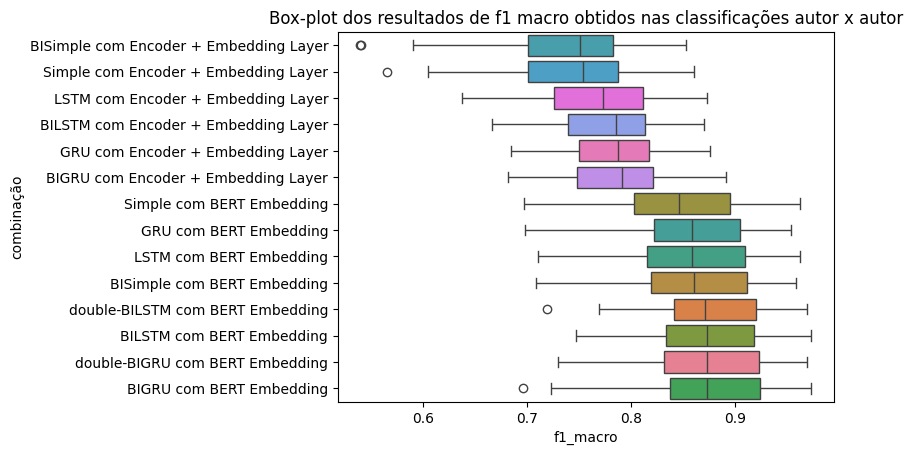

In [5]:
df_1x1_viz = df_1x1.copy()

df_1x1_viz.vectorizer = df_1x1_viz.vectorizer.map({
    'bert_Embedding': 'BERT Embedding',
    'embedding_layer': 'Encoder + Embedding Layer'
})

df_1x1_viz['combinação'] = df_1x1_viz.apply(lambda x:  x.rnn_layer + ' com ' +x.vectorizer, axis = 1)
df_1x1_viz = df_1x1_viz.rename({'model_name': 'pos tagger'}, axis=1)


sns.boxplot(
    data = df_1x1_viz, 
    x="f1_macro", 
    y='combinação', 
    hue='combinação',
    order = df_1x1_viz.groupby('combinação')['f1_macro'].median(numeric_only = True).sort_values().index.tolist()
    ).set_title(
        'Box-plot dos resultados de f1 macro obtidos nas classificações autor x autor'
    )

### one vs all

In [6]:
df_1xall = pd.DataFrame({})
   
for vectorization in ['embedding_layer', 'bert_Embedding']:
     
    for rnn_layer in ['GRU','LSTM','BIGRU', 'BILSTM', 'Simple', 'BISimple', 'double-BILSTM', 'double-BIGRU']:
        
        if vectorization == 'embedding_layer' and rnn_layer in ['double-BILSTM', 'double-BIGRU']:
            continue    
    
        for i in range(15):
        
            df = pd.read_csv(f'../models/intermediate_results/one-vs-all/simple_{rnn_layer}_{vectorization}_part{i}.csv')
            
            df_1xall = pd.concat([df, df_1xall])

In [7]:
df_1xall.drop(['author1', 'author2'],axis = 1).groupby(['rnn_layer', 'vectorizer']).mean().sort_values('f1_macro')[['f1_macro', 'recall_macro', 'precision_macro', 'accuracy']].round(4) * 100

f1_macro  recall_macro  precision_macro  \
rnn_layer     vectorizer                                                 
LSTM          embedding_layer     56.45         60.28            59.85   
GRU           embedding_layer     57.42         62.14            58.10   
BILSTM        embedding_layer     58.65         64.39            58.28   
BIGRU         embedding_layer     59.24         66.11            58.58   
BISimple      embedding_layer     59.42         63.23            58.29   
Simple        embedding_layer     59.87         64.02            58.60   
              bert_Embedding      69.00         71.14            67.66   
GRU           bert_Embedding      70.10         73.78            67.78   
LSTM          bert_Embedding      70.70         73.40            69.18   
BISimple      bert_Embedding      70.88         72.04            70.03   
BIGRU         bert_Embedding      71.63         73.70            70.48   
double-BIGRU  bert_Embedding      71.94         74.29            70.46   
double-BILSTM bert_Embedding      72.35         74.54            70.97   
BILSTM        bert_Embedding      72.66         73.73            72.23   

                               accuracy  
rnn_layer     vectorizer                 
LSTM          embedding_layer     87.20  
GRU           embedding_layer     85.71  
BILSTM        embedding_layer     84.93  
BIGRU         embedding_layer     83.54  
BISimple      embedding_layer     86.31  
Simple        embedding_layer     86.12  
              bert_Embedding      91.34  
GRU           bert_Embedding      91.18  
LSTM          bert_Embedding      91.80  
BISimple      bert_Embedding      92.49  
BIGRU         bert_Embedding      92.36  
double-BIGRU  bert_Embedding      92.27  
double-BILSTM bert_Embedding      92.50  
BILSTM        bert_Embedding      92.90

Text(0.5, 1.0, 'Distribuição dos resultados de F1 macro para cada método de vetorização')

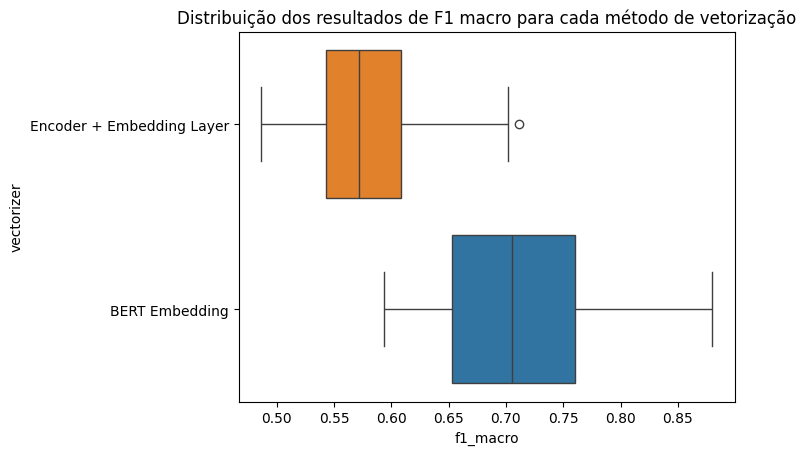

In [8]:
df_1xall_viz = df_1xall.copy()

df_1xall_viz.vectorizer = df_1xall_viz.vectorizer.map({
    'bert_Embedding': 'BERT Embedding',
    'embedding_layer': 'Encoder + Embedding Layer'
})

sns.boxplot(
    data = df_1xall_viz, 
    x="f1_macro", 
    y='vectorizer', 
    hue='vectorizer',
    order = df_1xall_viz.groupby('vectorizer')['f1_macro'].median(numeric_only = True).sort_values().index.tolist()
    ).set_title(
        'Distribuição dos resultados de F1 macro para cada método de vetorização'
    )

Text(0.5, 1.0, 'Box-plot dos resultados de f1 macro obtidos nas classificações autor x autor')

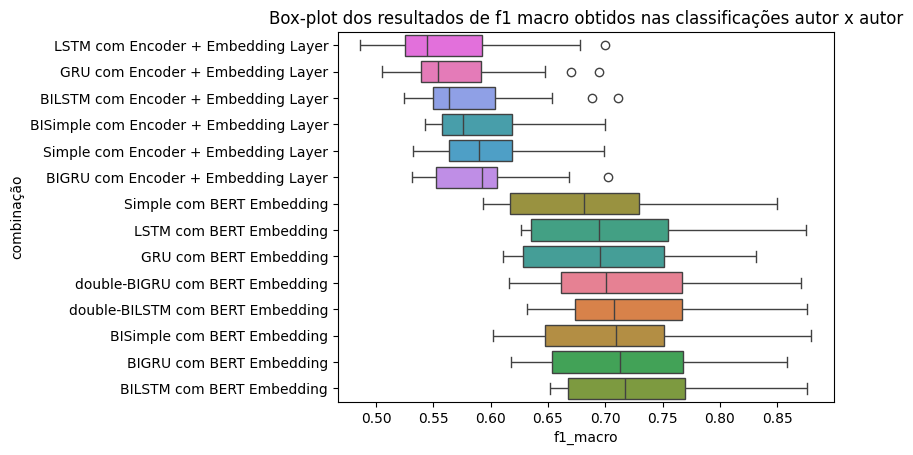

In [9]:
df_1xall_viz = df_1xall.copy()

df_1xall_viz.vectorizer = df_1xall_viz.vectorizer.map({
    'bert_Embedding': 'BERT Embedding',
    'embedding_layer': 'Encoder + Embedding Layer'
})

df_1xall_viz['combinação'] = df_1xall_viz.apply(lambda x:  x.rnn_layer + ' com ' +x.vectorizer, axis = 1)
df_1xall_viz = df_1xall_viz.rename({'model_name': 'pos tagger'}, axis=1)


sns.boxplot(
    data = df_1xall_viz, 
    x="f1_macro", 
    y='combinação', 
    hue='combinação',
    order = df_1xall_viz.groupby('combinação')['f1_macro'].median(numeric_only = True).sort_values().index.tolist()
    ).set_title(
        'Box-plot dos resultados de f1 macro obtidos nas classificações autor x autor'
    )

### multiclasse

In [10]:
df_mult = pd.DataFrame({})
   
for vectorization in ['embedding_layer', 'bert_Embedding']:
     
    for rnn_layer in ['GRU','LSTM','BIGRU', 'BILSTM', 'Simple', 'BISimple', 'double-BILSTM', 'double-BIGRU']:
        i = 0
        if vectorization == 'embedding_layer' and rnn_layer in ['double-BILSTM', 'double-BIGRU']:
            continue
        df = pd.read_csv(f'../models/intermediate_results/multiclass/simple_{rnn_layer}_{vectorization}_part{i}.csv')
        
        df_mult = pd.concat([df, df_mult])

In [11]:
df_mult.drop([f'author{i}' for i in range(0,15)],axis = 1).groupby(['rnn_layer', 'vectorizer']).mean().sort_values('f1_macro')[['f1_macro', 'recall_macro', 'precision_macro', 'accuracy']].round(4) * 100

,,f1_macro,recall_macro,precision_macro,accuracy
rnn_layer,vectorizer,,,,
Simple,embedding_layer,21.46,22.63,22.11,22.67
LSTM,embedding_layer,21.62,23.35,24.16,23.38
BISimple,embedding_layer,24.04,24.96,24.78,25.01
GRU,embedding_layer,25.35,26.13,26.85,26.24
BILSTM,embedding_layer,26.27,27.07,27.82,27.24
BIGRU,embedding_layer,28.61,29.28,29.12,29.38
Simple,bert_Embedding,42.05,42.31,42.17,42.39
LSTM,bert_Embedding,44.48,45.10,44.70,45.12
BISimple,bert_Embedding,47.10,47.34,47.47,47.37


Text(0.5, 1.0, 'Distribuição dos resultados de F1 macro para cada método de vetorização')

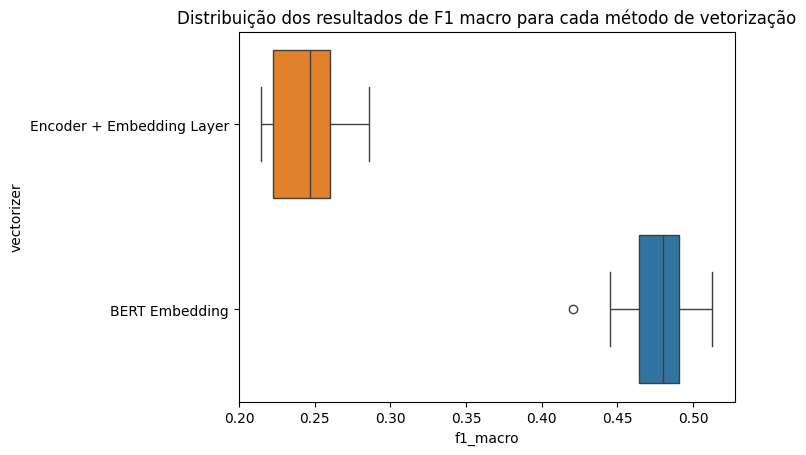

In [12]:
df_mult_viz = df_mult.copy()

df_mult_viz.vectorizer = df_mult_viz.vectorizer.map({
    'bert_Embedding': 'BERT Embedding',
    'embedding_layer': 'Encoder + Embedding Layer'
})

sns.boxplot(
    data = df_mult_viz, 
    x="f1_macro", 
    y='vectorizer', 
    hue='vectorizer',
    order = df_mult_viz.groupby('vectorizer')['f1_macro'].median(numeric_only = True).sort_values().index.tolist()
    ).set_title(
        'Distribuição dos resultados de F1 macro para cada método de vetorização'
    )

Text(0.5, 1.0, 'Barplot dos resultados de f1 macro obtidos nas classificações autor x autor')

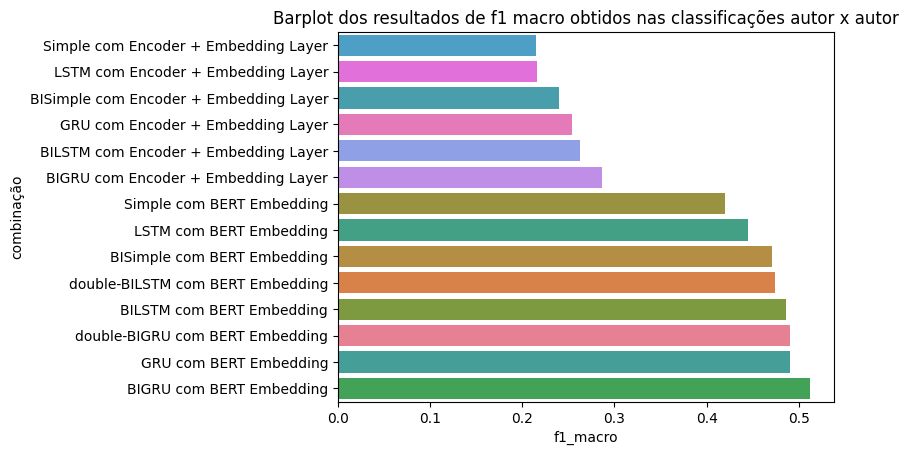

In [13]:
df_mult_viz = df_mult.copy()

df_mult_viz.vectorizer = df_mult_viz.vectorizer.map({
    'bert_Embedding': 'BERT Embedding',
    'embedding_layer': 'Encoder + Embedding Layer'
})

df_mult_viz['combinação'] = df_mult_viz.apply(lambda x:  x.rnn_layer + ' com ' +x.vectorizer, axis = 1)
df_mult_viz = df_mult_viz.rename({'model_name': 'pos tagger'}, axis=1)


sns.barplot(
    data = df_mult_viz, 
    x="f1_macro", 
    y='combinação', 
    hue='combinação',
    order = df_mult_viz.groupby('combinação')['f1_macro'].median(numeric_only = True).sort_values().index.tolist()
    ).set_title(
        'Barplot dos resultados de f1 macro obtidos nas classificações autor x autor'
    )